<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Metric-based models</center></h2>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Curse of dimentionality

## Euclidean distance case

* For each dimensionality $d \in [1, 200]$ generate a dataset of $100$ random points from uniform distribution
on $[−1, 1]^d$
    * HINT: `np.random.uniform`.


* Write the function that calculates Euclidean distances from the given point $x$ to its nearest and farthest
neighbors in the dataset (minimum and maximum distances).
    * HINT: `scipy.spatial.distance.cdist`, `np.max`, `np.min`


* Plot average minimum and maximum distances for varying $d$ (here you should calculate average values on dataset). Also plot their ratio — average maximum divided by average minimum. Does curse of dimentionality takes place here?

In [69]:
d = 2
X = np.random.uniform(low=-1, high=1, size=(100, d))


In [70]:
X.shape

(100, 2)

In [71]:
X[:10]

array([[ 0.6596607 ,  0.99155642],
       [-0.96926385,  0.78772095],
       [ 0.50353177,  0.25227592],
       [-0.43342404, -0.29068937],
       [-0.35844907,  0.25644357],
       [-0.4297861 ,  0.27547003],
       [ 0.69061013,  0.92771977],
       [-0.01916718, -0.31043392],
       [ 0.31127999, -0.06303226],
       [-0.53046931, -0.76994399]])

In [72]:
from scipy.spatial.distance import cdist

In [73]:
D = cdist(X, X, )

In [74]:
D.shape

(100, 100)

In [75]:
np.max(D, axis=1)

array([ 2.43706964,  2.59166158,  1.79077936,  1.82737032,  1.7829589 ,
        1.84774668,  2.40684852,  1.55134349,  1.5373918 ,  2.23279794,
        2.42715125,  2.01177163,  2.44208439,  1.60518669,  2.52438975,
        2.39014035,  2.00246341,  1.59215373,  2.3418879 ,  1.41841733,
        2.28623054,  1.93471164,  2.0747192 ,  1.98974287,  2.26768278,
        1.57493708,  1.7938325 ,  1.4406499 ,  1.62498868,  1.61792361,
        1.86409185,  1.58956271,  2.11108364,  1.81667155,  1.72190852,
        2.05909319,  2.1560919 ,  2.169528  ,  2.05846056,  2.53244332,
        1.84533476,  1.99543334,  2.06183752,  1.90339804,  2.1960775 ,
        1.88051386,  2.0666818 ,  1.90121756,  2.02282683,  2.1487255 ,
        2.25462255,  2.1876425 ,  2.05100914,  2.05086017,  2.38497004,
        1.66573849,  2.34882844,  2.07742781,  1.75081246,  2.09838044,
        2.59166158,  2.39460798,  1.95985036,  1.89194067,  1.35402464,
        1.75207545,  2.31498327,  2.29591971,  2.31834881,  2.16

In [76]:
np.min(D, axis=1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [77]:
min_avg = []
max_avg = []

for d in range(1, 201):
    X = np.random.uniform(-1, 1, (100, d))
    
    D = cdist(X, X, metric='euclidean')
    D[np.diag_indices(100)] = np.nan
    
    min_avg.append(np.nanmin(D, axis=1).mean())
    max_avg.append(np.nanmax(D, axis=1).mean())

In [78]:
len(min_avg)

200

In [79]:
min_avg = np.array(min_avg)
max_avg = np.array(max_avg)

In [80]:
ratio = max_avg/min_avg

In [81]:
ratio.shape

(200,)

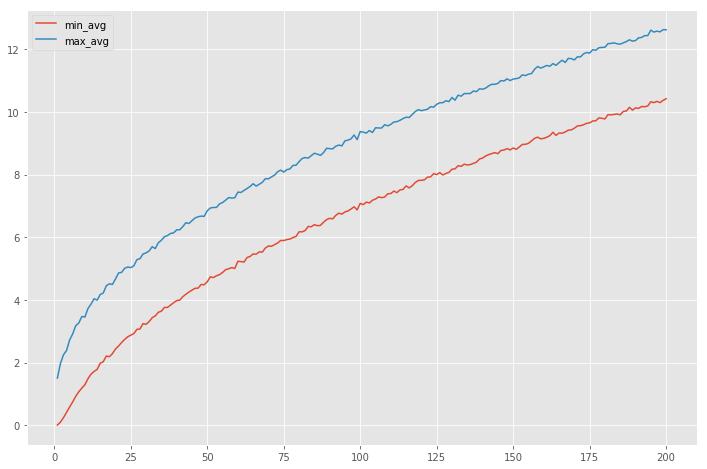

In [82]:
d = range(1,201)
plt.plot(d, min_avg, label='min_avg')
plt.plot(d, max_avg, label='max_avg')
plt.legend()

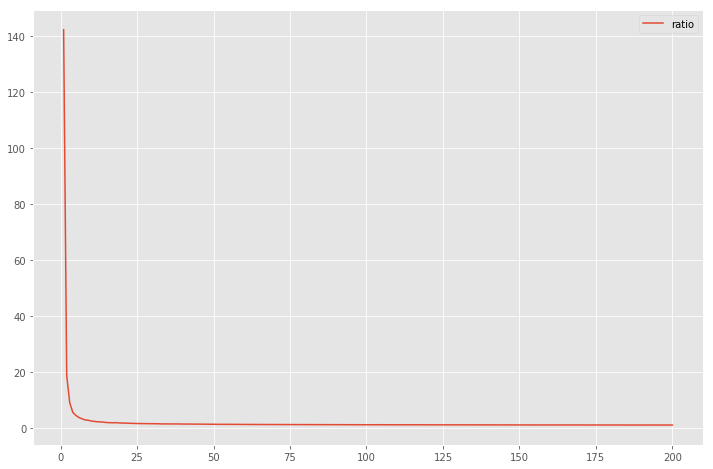

In [83]:
plt.plot(d, ratio, label='ratio')
plt.legend()

## Cosine distance case

* For each dimensionality $d \in [1, 10, 100, ..., 10000]$ generate a dataset of $100$ random points from uniform distribution
on $[−1, 1]^d$
    * HINT: `np.logspace`.


* Write the function that calculates angles between all points in dataset.
    * HINT: `np.degrees`, `np.arccos`


* Plot a histogram of computed angles for each $d$. Does curse of dimentionality takes place here?

In [84]:
D

array([[         nan,  11.31391018,  11.40312817, ...,  11.37778956,
         11.56961361,  11.39881638],
       [ 11.31391018,          nan,  11.2317266 , ...,  12.55852047,
         11.47509914,  10.69792714],
       [ 11.40312817,  11.2317266 ,          nan, ...,  11.76173067,
         10.9894578 ,  11.31692852],
       ..., 
       [ 11.37778956,  12.55852047,  11.76173067, ...,          nan,
         11.23951929,  11.82617837],
       [ 11.56961361,  11.47509914,  10.9894578 , ...,  11.23951929,
                 nan,  11.91474864],
       [ 11.39881638,  10.69792714,  11.31692852, ...,  11.82617837,
         11.91474864,          nan]])

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in arccos


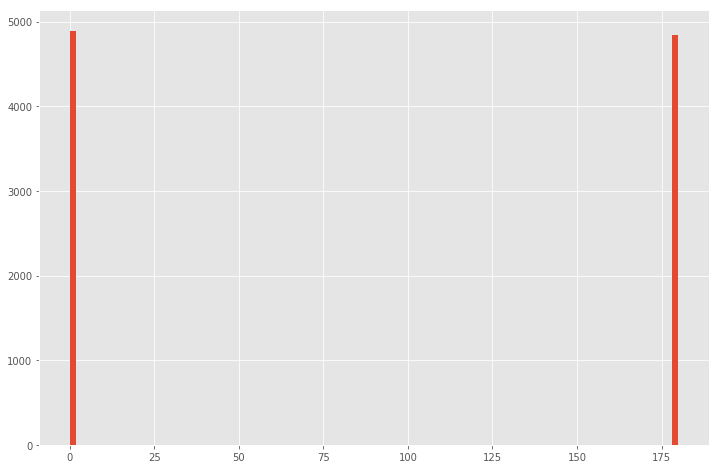

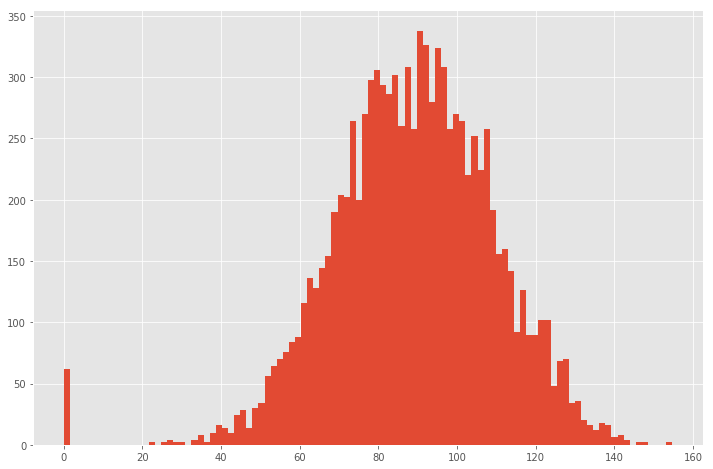

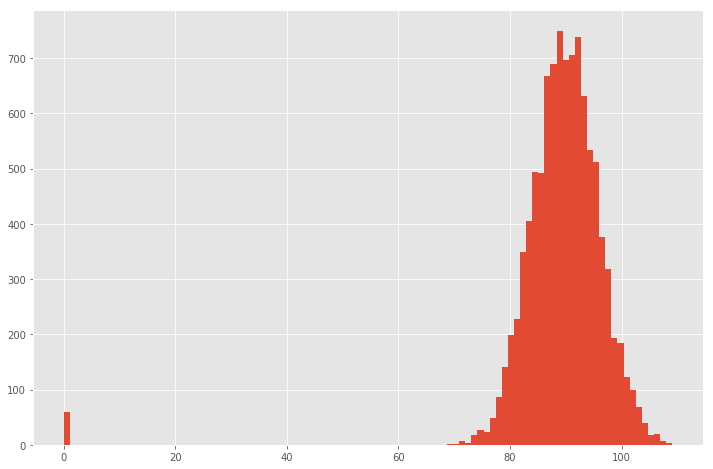

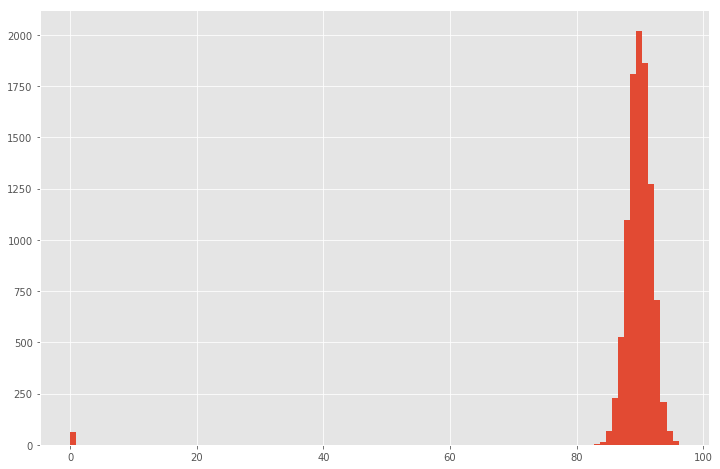

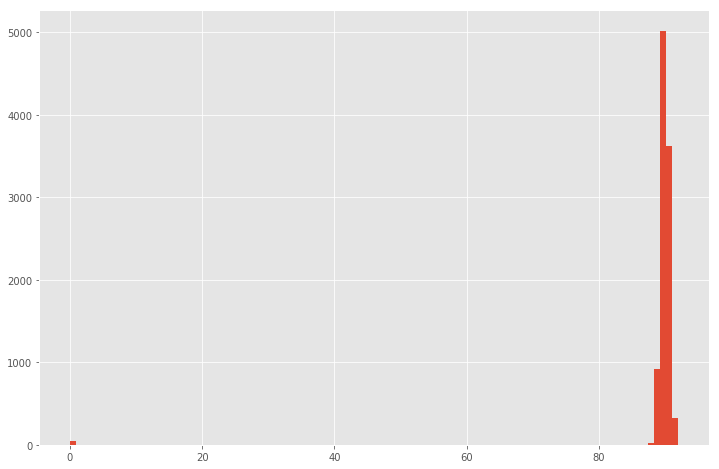

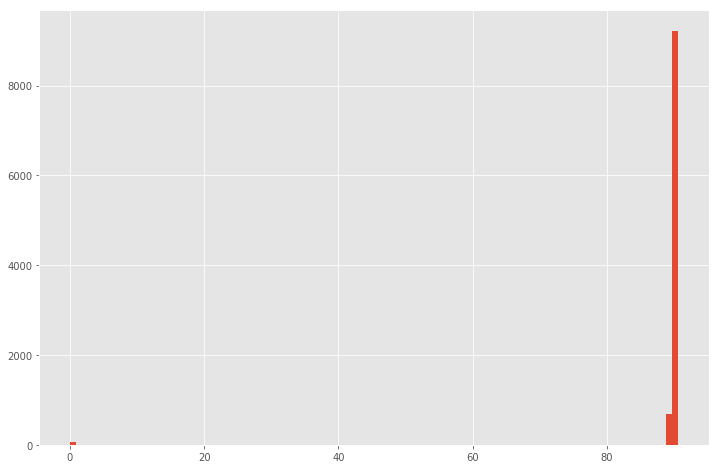

In [85]:
for d in np.logspace(0, 5, num=6, base=10, dtype=int):
    X = np.random.uniform(-1, 1, (100, d))
    
    D = cdist(X, X, metric='cosine')
#     D[np.diag_indices(100)] = np.nan
    D = -(D-1)
    angle_avg = (np.degrees(np.arccos(D))).flatten()

    plt.figure()
    plt.hist(angle_avg[~np.isnan(angle_avg)], bins=100)

# House prices in California

We are going to use build-in sklearn dataset

In [86]:
from sklearn.datasets import fetch_california_housing

In [87]:
data = fetch_california_housing()

X = data.data
y = data.target

In [88]:
print(data.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




* Plot lat and lon coordinates of each household and colorize it with respect to value of target feature
    * HINT: `plt.scatter()`

(array([  877.,  3612.,  4099.,  3771.,  2799.,  1769.,  1239.,   752.,
          479.,  1243.]),
 array([ 0.14999 ,  0.634992,  1.119994,  1.604996,  2.089998,  2.575   ,
         3.060002,  3.545004,  4.030006,  4.515008,  5.00001 ]),
 <a list of 10 Patch objects>)

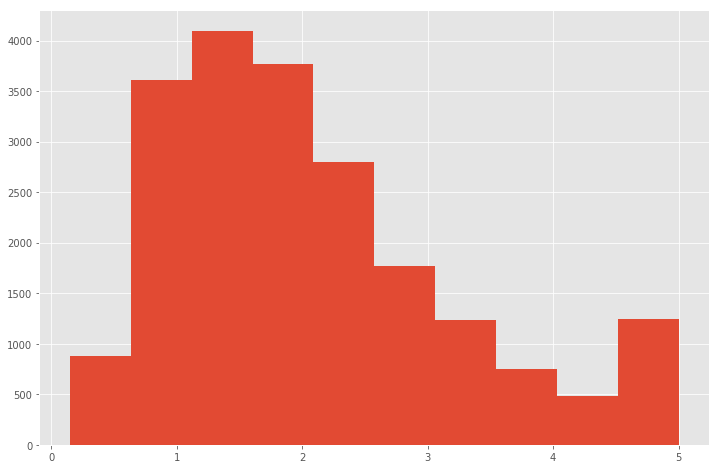

In [89]:
plt.hist(y)

In [90]:
X = X[:, -2:]

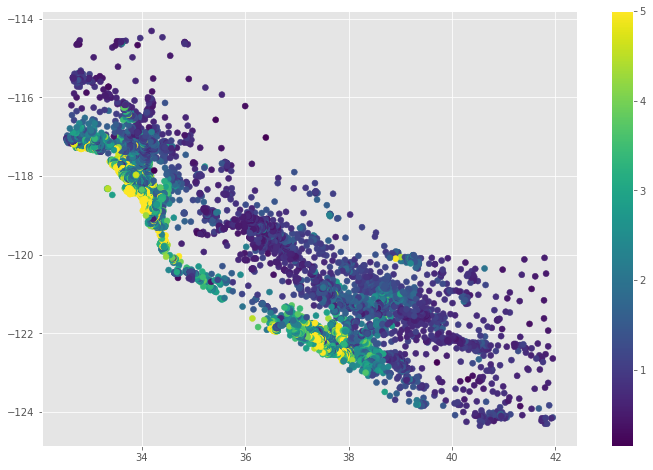

In [91]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

* Consider only geo-coordinates of houses in design matrix and convert them to radians
    * HINT: `np.radians`
* Split dataset to train and validation set on proportion 80/20
    * HINT: `sklearn.model_selection.train_test_split()` and don't forget to set `random_state`

In [92]:
X = np.radians(X)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2,
                                                      random_state=123)

In [95]:
X_train.shape

(16512, 2)

In [96]:
X_valid.shape

(4128, 2)

* Consider k-NN classifier with `haversine` distance metric
    * HINT: sklearn.metrics
* For k in 1..15 plot mean squared error at train and validation set
    * noticed any methodological failures?
    * whick $k$ would you pick?

In [97]:
from sklearn.neighbors import KNeighborsRegressor

In [98]:
knn = KNeighborsRegressor(n_neighbors=2, metric='haversine', 
                           algorithm='ball_tree')

In [99]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='haversine',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [100]:
y_hat = knn.predict(X_train)

In [101]:
from sklearn.metrics import mean_absolute_error

In [102]:
mean_absolute_error(y_train, y_hat)

0.21116684714147288

In [103]:
scores_valid = []
scores_train = []

for k in range(1, 16):
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='ball_tree',
                              metric='haversine')
    knn.fit(X_train, y_train)
    
    y_hat_train = knn.predict(X_train)
    y_hat_valid = knn.predict(X_valid)
    
    scores_train.append(mean_absolute_error(y_train, y_hat_train))
    scores_valid.append(mean_absolute_error(y_valid, y_hat_valid))

KeyboardInterrupt: 

In [ ]:
plt.plot(scores_train, label='train')
plt.plot(scores_valid, label='valid')
plt.legend()

* Pick your model and colorize the whole lat-lon grid with its predictions
    * HINT: `np.meshgrid()`, `plt.contourf()`

# Churn prediction

* Load churn dataset from the csv file with pandas
* Describe type of each feature
* Describe scale of each feature

In [104]:
df = pd.read_csv('churn.csv')

* Prepare dataset
    * Delete useless features
    * Encode categorical and binary features
    * Create matrix `X` with predictors and array `y` with target feature
    * Split it to train and validation set in proportion 80/20

In [107]:
df.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account Length,128,107,137,84,75
Area Code,415,415,415,408,415
Phone,382-4657,371-7191,358-1921,375-9999,330-6626
Int'l Plan,no,no,no,yes,yes
VMail Plan,yes,yes,no,no,no
VMail Message,25,26,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7
Day Calls,110,123,114,71,113
Day Charge,45.07,27.47,41.38,50.9,28.34


In [108]:
df.State.nunique()

51

In [114]:
def preprocess_data(df_input):
    
    # Удалили столобцы
    del_cols = ['State', 'Area Code', 'Phone']    
    df_input = df_input.drop(del_cols, axis=1)
    
    # Закодируем бинарные перемененные
    df_input.loc[:, ["Int'l Plan", "VMail Plan"]] = df_input.loc[:, ["Int'l Plan", "VMail Plan"]]\
                                                            .replace({'no': 0, 'yes': 1})
        
    df_input.loc[:, 'Churn?'] = df_input.loc[:, 'Churn?']\
                                       .replace({'False.': 0, 
                                                 'True.': 1})
    
    return df_input

In [115]:
df_preproc = df.pipe(preprocess_data)

In [117]:
df_preproc.head().T

,0,1,2,3,4
Account Length,128.00,107.00,137.00,84.00,75.00
Int'l Plan,0.00,0.00,0.00,1.00,1.00
VMail Plan,1.00,1.00,0.00,0.00,0.00
VMail Message,25.00,26.00,0.00,0.00,0.00
Day Mins,265.10,161.60,243.40,299.40,166.70
Day Calls,110.00,123.00,114.00,71.00,113.00
Day Charge,45.07,27.47,41.38,50.90,28.34
Eve Mins,197.40,195.50,121.20,61.90,148.30
Eve Calls,99.00,103.00,110.00,88.00,122.00
Eve Charge,16.78,16.62,10.30,5.26,12.61


In [118]:
df_preproc.loc[:, 'Churn?'].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [119]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

In [120]:
X.shape

(3333, 17)

In [121]:
y.shape

(3333,)

In [122]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

 * For k in 1..15 plot roc-auc score at train and validation set

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
from sklearn.metrics import recall_score

In [125]:
scores_valid = []
scores_train = []

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_hat_train = knn.predict(X_train)
    y_hat_valid = knn.predict(X_valid)
    
    scores_train.append(recall_score(y_train, y_hat_train))
    scores_valid.append(recall_score(y_valid, y_hat_valid))

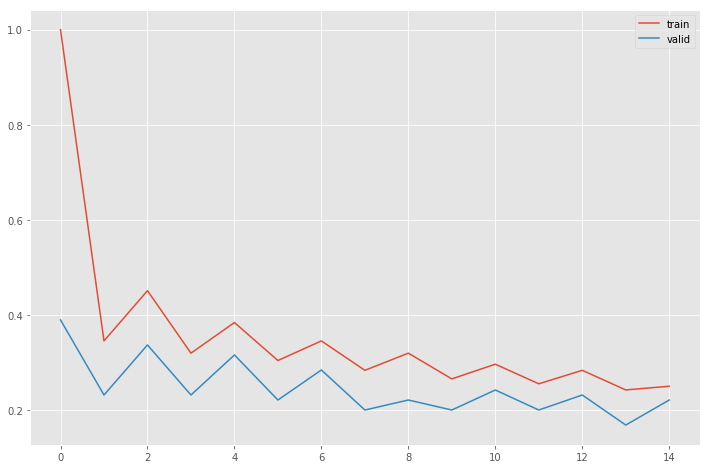

In [127]:
plt.plot(scores_train, label='train')
plt.plot(scores_valid, label='valid')
plt.legend()

* Consider feature normalization
    * HINT: `sklearn.preprocess.StantardScaler()`
* Build a pipeline that would normalize features before using K-NN
    * HINT: `sklearn.pipeline`
* For k in 1..15 plot roc-auc score at train and validation set
    * Does it make any difference?

In [ ]:
# X = (X-X.mean(axis=1))/X.std(axis=1)

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
from sklearn.pipeline import Pipeline

In [131]:
scores_valid = []
scores_train = []

for k in range(1, 16):
    knn = Pipeline([
        ('scale', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=k))
    ])
    
    knn.fit(X_train, y_train)
    
    y_hat_train = knn.predict(X_train)
    y_hat_valid = knn.predict(X_valid)
    
    scores_train.append(recall_score(y_train, y_hat_train))
    scores_valid.append(recall_score(y_valid, y_hat_valid))

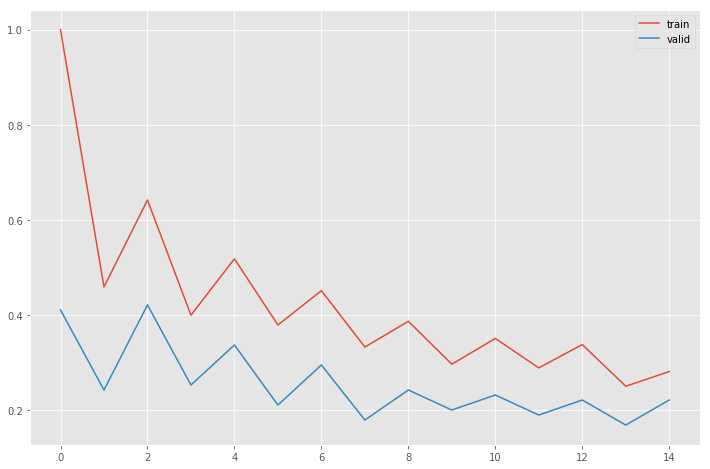

In [132]:
plt.plot(scores_train, label='train')
plt.plot(scores_valid, label='valid')
plt.legend()